## Sentiment Anylisis Model Gift Cards
### COMP262 - Group 5
### Ruben Ormeno
### Mariela
### Samantha
### Juan
### Jose Muniz


### 1. Dataset data exploration

In [1]:
import numpy as np
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import re
import seaborn as sns
import matplotlib.pyplot as plt


In [5]:
import json
import pandas as pd
df = pd.read_json(r'C:\users\saman\Downloads\Sentimental-analysis-of-amazon-Gift_Card-reviews-main\Sentimental-analysis-of-amazon-Gift_Card-reviews-main\Gift_Cards_5.json',lines = True)

# Field Description
### overall (bigint) – User rating (1-5)
### verified (boolean)  Is the review verified (true, false)
### reviewtime (string) – Timestamp formatted like “10 30, 2009”
### reviewerid (string) – Amazon generated user id
### asin (string) – Unique Amazon generated product id
### reviewername (string) – User supplied name
### reviewtext (string) – Review text
### summary (string) – Summary of Review text
### unixreviewtime (bigint) – Timestamp formatted in epoch time.
### vote (double) – Userful voters form other users
### image -  images that users post after they have received the product

In [6]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2972 entries, 0 to 2971
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   overall         2972 non-null   int64  
 1   verified        2972 non-null   bool   
 2   reviewTime      2972 non-null   object 
 3   reviewerID      2972 non-null   object 
 4   asin            2972 non-null   object 
 5   style           864 non-null    object 
 6   reviewerName    2972 non-null   object 
 7   reviewText      2966 non-null   object 
 8   summary         2972 non-null   object 
 9   unixReviewTime  2972 non-null   int64  
 10  vote            208 non-null    float64
 11  image           12 non-null     object 
dtypes: bool(1), float64(1), int64(2), object(8)
memory usage: 258.4+ KB


In [7]:
df.describe()

,overall,unixReviewTime,vote
count,2972.000000,2.972000e+03,208.000000
mean,4.885262,1.476136e+09,5.158654
std,0.484660,3.379616e+07,7.366121
min,1.000000,1.327968e+09,2.000000
25%,5.000000,1.454890e+09,2.000000
50%,5.000000,1.482710e+09,3.000000
75%,5.000000,1.500271e+09,5.000000
max,5.000000,1.534896e+09,60.000000


In [8]:
df.head()

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,5,True,"06 17, 2018",A31UBHTUUIFJUT,B004LLIKVU,{'Gift Amount:': ' 50'},john stoiber,Another great gift.,Five Stars,1529193600,NaN,NaN
1,4,True,"06 14, 2018",A2MN5JQMIY0FQ2,B004LLIKVU,{'Gift Amount:': ' 50'},Amazon Customer,Gift card for my daughter,Ease of use,1528934400,NaN,NaN
2,5,True,"06 2, 2018",A25POI5IGGENPM,B004LLIKVU,{'Gift Amount:': ' 50'},Kindle Customer,Nice present,Five Stars,1527897600,NaN,NaN
3,5,True,"05 19, 2018",A2HYGTHB4LJ9FW,B004LLIKVU,{'Gift Amount:': ' 50'},Amante dei Gatti,My niece loved this birthday greeting/gift card.,Love the convenience of eCards,1526688000,NaN,NaN
4,5,True,"05 18, 2018",ACDG3M94UMZGJ,B004LLIKVU,{'Gift Amount:': ' 50'},Joan Freesh,fine as a gift.,Five Stars,1526601600,NaN,NaN


## 1a. Counts, averages

In [9]:
def missing_values_analysis(df):
    na_columns = [col for col in df.columns if df[col].isnull().sum() > 0]  # Columns with missing values
    n_miss = df[na_columns].isnull().sum().sort_values(ascending=False)  # Number of missing values, sorted
    ratio = (df[na_columns].isnull().sum() / df.shape[0] * 100).sort_values(ascending=False)  # Percentage of missing values, sorted
    missing_df = pd.concat([n_miss, np.around(ratio, 2)], axis=1, keys=['Missing Values', 'Ratio (%)'])  # Concatenate counts and percentages
    return missing_df
def check_dataframe(df, head=5, tail=5):
    print("SHAPE".center(82, '~'))
    print('Rows: {}'.format(df.shape[0]))
    print('Columns: {}'.format(df.shape[1]))
    print("TYPES".center(82,'~'))
    print(df.dtypes)
    print("MISSING VALUES ANALYSIS".center(82, '~'))
    print(missing_values_analysis(df))
    print("FREQUENCY ANALYSIS".center(82, '~'))
    print(f"Frequency for {'overall'}:".center(82, '-'))
    print(df['overall'].value_counts().head())
    print("\n")
    print("QUANTILES".center(82, '~'))
    try:
        # Calculate quantiles for numeric columns only
        numeric_cols = df.select_dtypes(include=[np.number]).columns
        print(df[numeric_cols].quantile([0, 0.50, 0.75, 1]).T)
    except Exception as e:
        print(f"Error calculating quantiles: {e}")
    if head > 0:
        print("FIRST {} ROWS".format(head).center(82, '~'))
        print(df.head(head))
    if tail > 0:
        print("LAST {} ROWS".format(tail).center(82, '~'))
        print(df.tail(tail))

# You can now call check_dataframe(df) again with this adjusted function.
check_dataframe(df)

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~SHAPE~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Rows: 2972
Columns: 12
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~TYPES~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
overall             int64
verified             bool
reviewTime         object
reviewerID         object
asin               object
style              object
reviewerName       object
reviewText         object
summary            object
unixReviewTime      int64
vote              float64
image              object
dtype: object
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~MISSING VALUES ANALYSIS~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
            Missing Values  Ratio (%)
image                 2960      99.60
vote                  2764      93.00
style                 2108      70.93
reviewText               6       0.20
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~FREQUENCY ANALYSIS~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
------------------------------Frequency for overall:------------------------------
overall
5    2752
4     154
3      33
1      2

In [10]:
# classes by variable

import pandas as pd

def check_class(dataframe):
    unique_counts = []
    for column in dataframe.columns:
        try:
            # Attempt to count unique values in the usual way
            unique_count = dataframe[column].nunique()
        except TypeError:
            # Handle unhashable items by converting them to strings (or another approach as needed)
            unique_count = dataframe[column].astype(str).nunique()
        unique_counts.append(unique_count)

    # Create DataFrame with counts
    nunique_df = pd.DataFrame({'Variable': dataframe.columns, 'Classes': unique_counts})
    nunique_df = nunique_df.sort_values('Classes', ascending=False).reset_index(drop=True)
    return nunique_df
check_class(df)

,Variable,Classes
0,reviewText,1937
1,summary,952
2,reviewTime,797
3,unixReviewTime,797
4,reviewerID,458
5,reviewerName,429
6,asin,148
7,vote,20
8,style,18
9,image,13


## 1b. Distribution of number of reviews across products

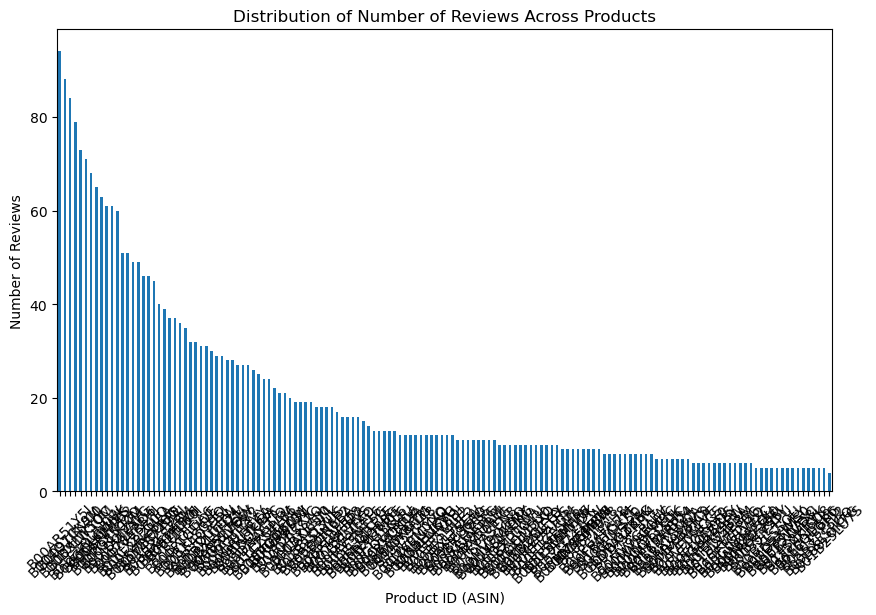

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the number of reviews per product (ASIN)
review_counts = df['asin'].value_counts()

# Create the plot
plt.figure(figsize=(10, 6))
review_counts.plot(kind='bar')
plt.title('Distribution of Number of Reviews Across Products')
plt.xlabel('Product ID (ASIN)')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.show()

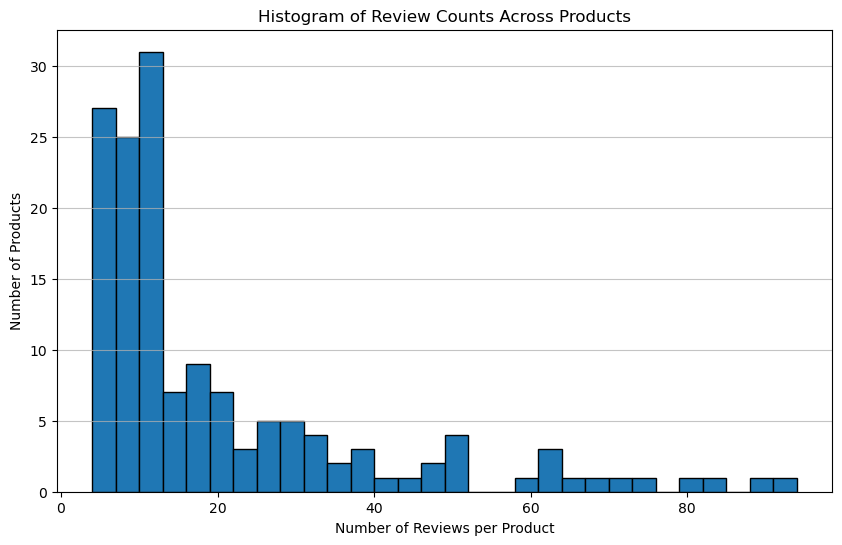

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the number of reviews per product (ASIN)
review_counts = df['asin'].value_counts()

# Create the histogram plot
plt.figure(figsize=(10, 6))
plt.hist(review_counts, bins=30, edgecolor='black')
plt.title('Histogram of Review Counts Across Products')
plt.xlabel('Number of Reviews per Product')
plt.ylabel('Number of Products')
plt.grid(axis='y', alpha=0.75)

# Show the plot
plt.show()


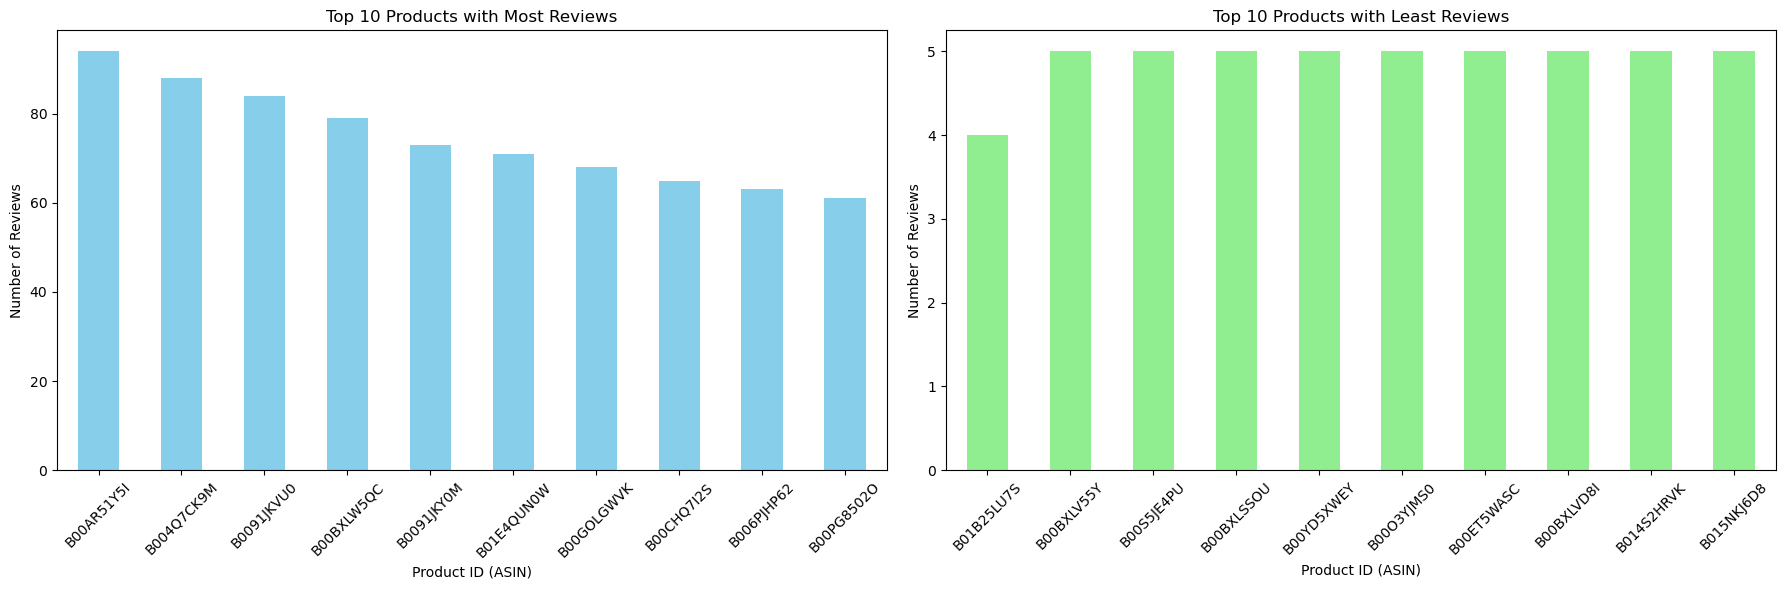

In [13]:
# Calculate the top 10 products with the most reviews
top_reviewed_asins = df['asin'].value_counts().head(10)

# Calculate the top 10 products with the least reviews
least_reviewed_asins = df['asin'].value_counts().nsmallest(10)

# Plotting both top and least reviewed products side by side for comparison
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Top reviewed ASINs plot
top_reviewed_asins.plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Top 10 Products with Most Reviews')
axes[0].set_xlabel('Product ID (ASIN)')
axes[0].set_ylabel('Number of Reviews')
axes[0].tick_params(axis='x', rotation=45)

# Least reviewed ASINs plot
least_reviewed_asins.plot(kind='bar', ax=axes[1], color='lightgreen')
axes[1].set_title('Top 10 Products with Least Reviews')
axes[1].set_xlabel('Product ID (ASIN)')
axes[1].set_ylabel('Number of Reviews')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


## 1c. Distribution of number of reviews per products

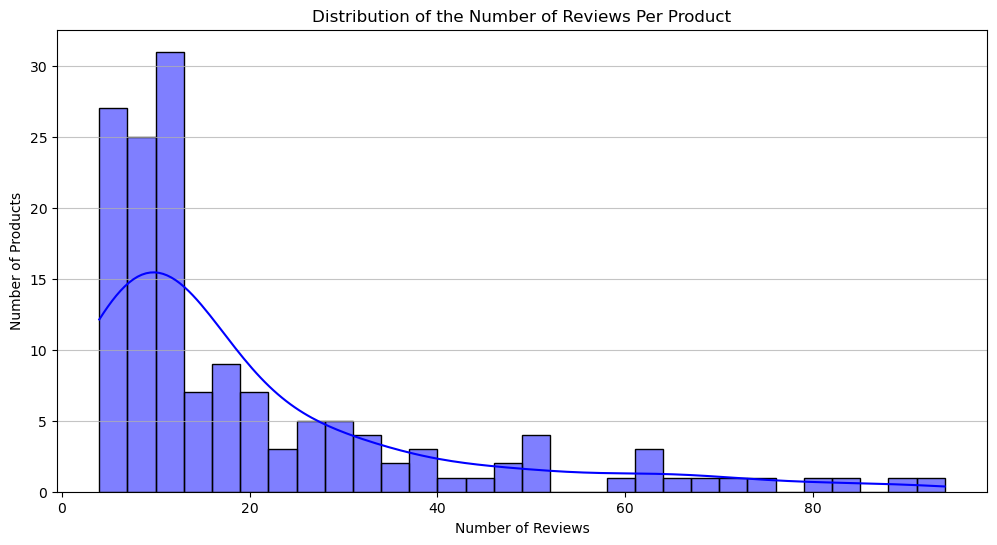

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

reviews_per_product = df['asin'].value_counts()

# plot using seaborn
plt.figure(figsize=(12, 6))
sns.histplot(reviews_per_product, bins=30, kde=True, color='blue')
plt.title('Distribution of the Number of Reviews Per Product')
plt.xlabel('Number of Reviews')
plt.ylabel('Number of Products')
plt.grid(axis='y', alpha=0.75)

plt.show()


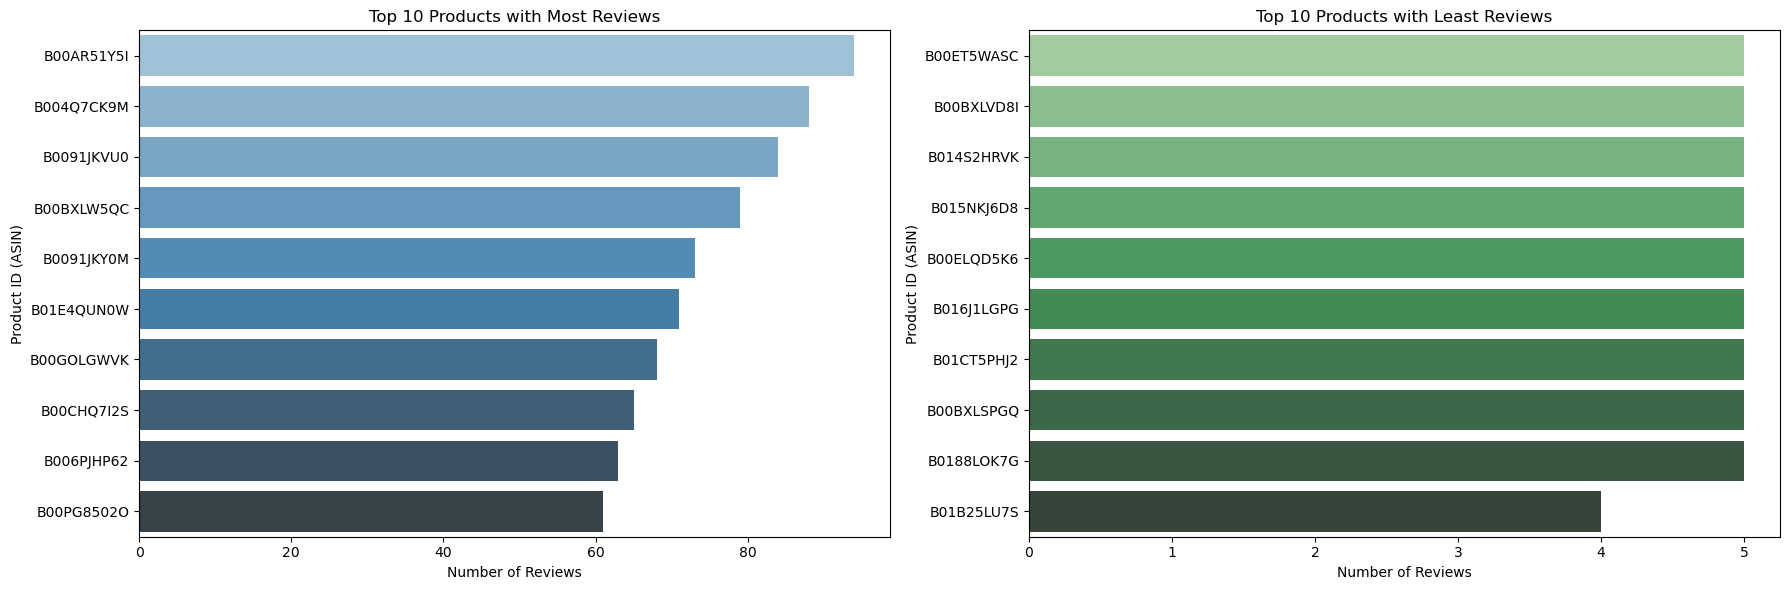

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'df' is your DataFrame containing the dataset information

# Calculate the top 10 products with the most reviews and their counts
top_10_most_reviews = df['asin'].value_counts().head(10)

# Calculate the top 10 products with the least reviews and their counts
top_10_least_reviews = df['asin'].value_counts().tail(10)

# Creating subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Plot for top 10 products with most reviews
sns.barplot(x=top_10_most_reviews.values, y=top_10_most_reviews.index, ax=axes[0], palette="Blues_d")
axes[0].set_title('Top 10 Products with Most Reviews')
axes[0].set_xlabel('Number of Reviews')
axes[0].set_ylabel('Product ID (ASIN)')

# Plot for top 10 products with least reviews
sns.barplot(x=top_10_least_reviews.values, y=top_10_least_reviews.index, ax=axes[1], palette="Greens_d")
axes[1].set_title('Top 10 Products with Least Reviews')
axes[1].set_xlabel('Number of Reviews')
axes[1].set_ylabel('Product ID (ASIN)')

plt.tight_layout()
plt.show()


# 1d. Distribution reviews per user

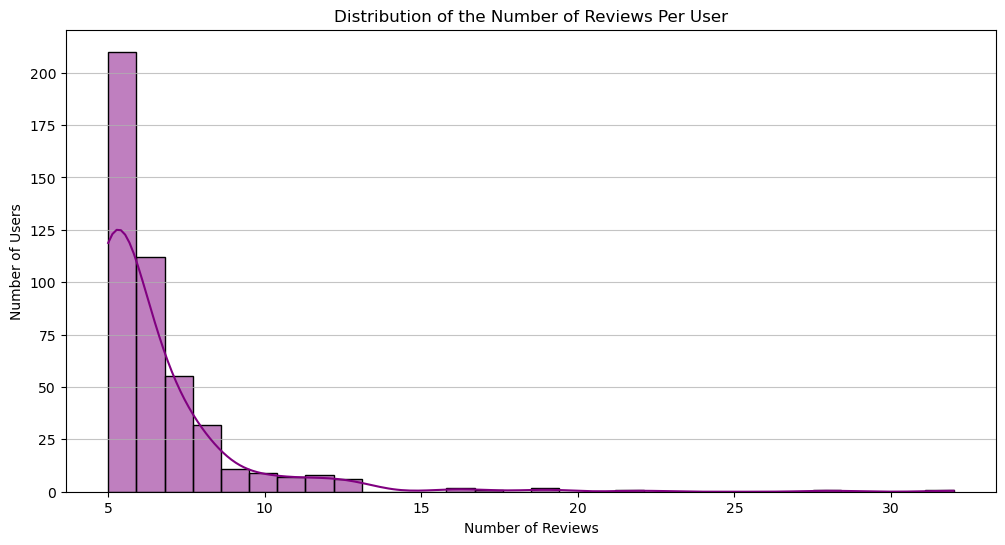

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Calculate the number of reviews per user
reviews_per_user = df['reviewerID'].value_counts()

# Plot the distribution of the number of reviews per user using seaborn
plt.figure(figsize=(12, 6))
sns.histplot(reviews_per_user, bins=30, kde=True, color='purple')
plt.title('Distribution of the Number of Reviews Per User')
plt.xlabel('Number of Reviews')
plt.ylabel('Number of Users')
plt.grid(axis='y', alpha=0.75)

plt.show()

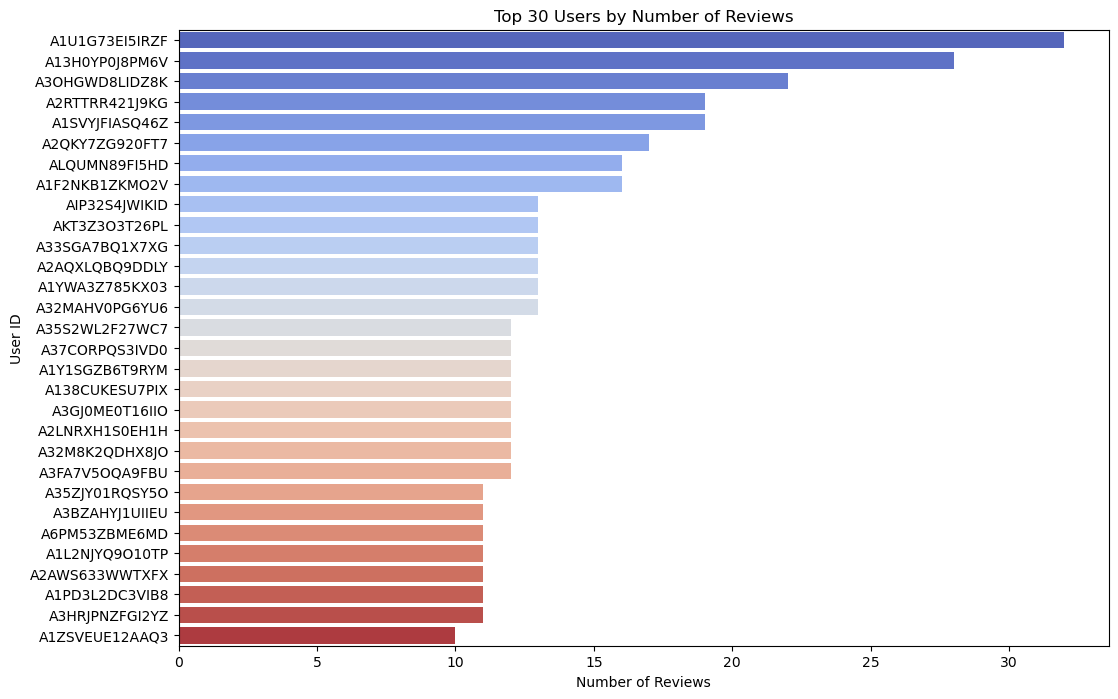

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Top 30 users with the most reviews and their counts
top_30_users_reviews = df['reviewerID'].value_counts().head(30)

# Plotting the distribution of reviews for the top 30 users
plt.figure(figsize=(12, 8))
sns.barplot(y=top_30_users_reviews.index, x=top_30_users_reviews.values, palette='coolwarm')
plt.title('Top 30 Users by Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('User ID')

plt.show()

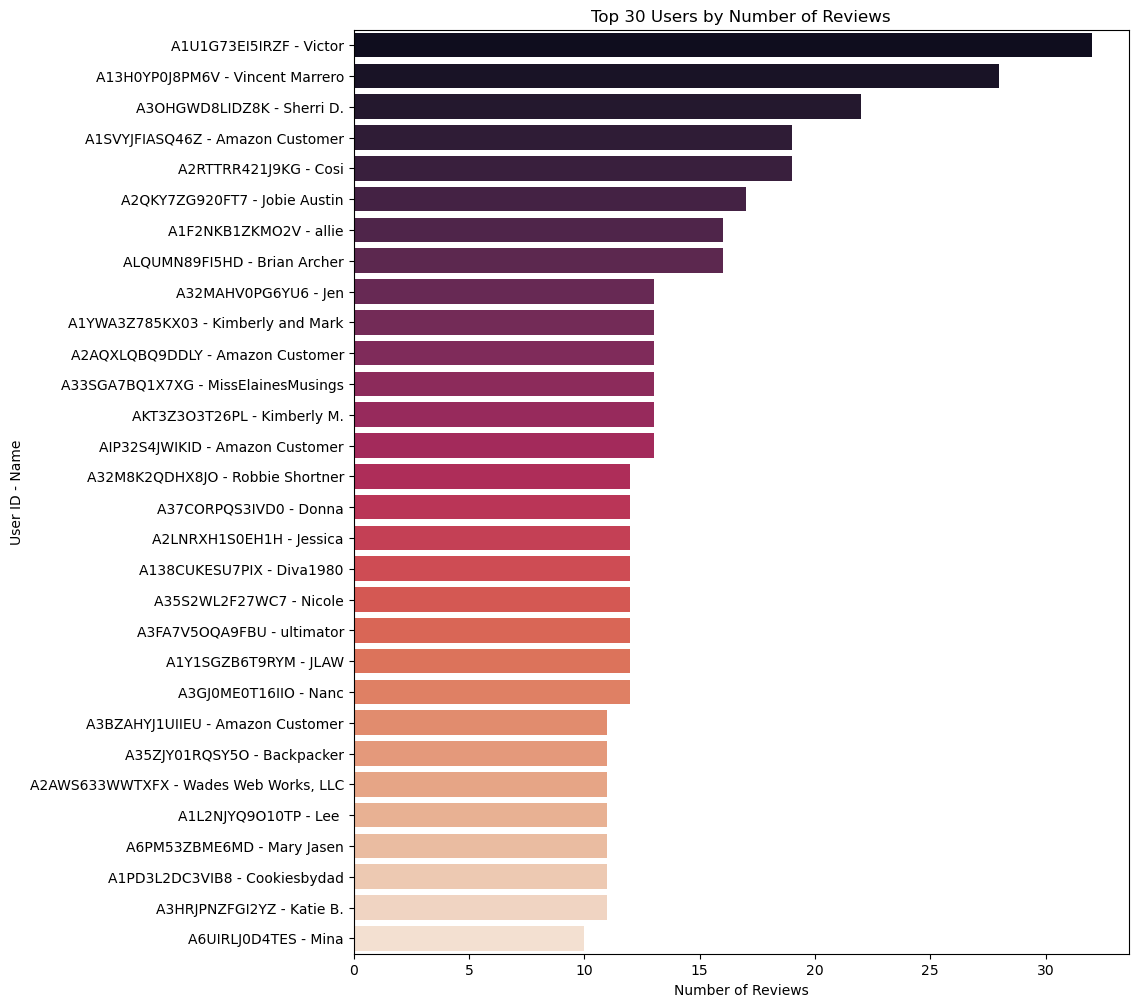

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a new column that combines 'reviewerID' and 'reviewerName'
df['ID_Name'] = df['reviewerID'] + ' - ' + df['reviewerName']

top_30_combined = df['ID_Name'].value_counts().head(30)

# Plotting
plt.figure(figsize=(10, 12))
sns.barplot(x=top_30_combined.values, y=top_30_combined.index, palette='rocket')
plt.title('Top 30 Users by Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('User ID - Name')

plt.show()


## 2.	Text basic pre-processing:

In [19]:
# a. Labeling the data based on ratings
def label_rating(row):
    if row['overall'] >= 4:
        return 'positive'
    elif row['overall'] == 3:
        return 'neutral'
    else:  # Ratings 1 and 2
        return 'negative'

df['rating_label'] = df.apply(label_rating, axis=1)

In [20]:
# Dropping columns 'image', 'vote', and 'style' columns
df.drop(columns=['image', 'vote', 'style'], inplace=True, errors='ignore')
df.head()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,ID_Name,rating_label
0,5,True,"06 17, 2018",A31UBHTUUIFJUT,B004LLIKVU,john stoiber,Another great gift.,Five Stars,1529193600,A31UBHTUUIFJUT - john stoiber,positive
1,4,True,"06 14, 2018",A2MN5JQMIY0FQ2,B004LLIKVU,Amazon Customer,Gift card for my daughter,Ease of use,1528934400,A2MN5JQMIY0FQ2 - Amazon Customer,positive
2,5,True,"06 2, 2018",A25POI5IGGENPM,B004LLIKVU,Kindle Customer,Nice present,Five Stars,1527897600,A25POI5IGGENPM - Kindle Customer,positive
3,5,True,"05 19, 2018",A2HYGTHB4LJ9FW,B004LLIKVU,Amante dei Gatti,My niece loved this birthday greeting/gift card.,Love the convenience of eCards,1526688000,A2HYGTHB4LJ9FW - Amante dei Gatti,positive
4,5,True,"05 18, 2018",ACDG3M94UMZGJ,B004LLIKVU,Joan Freesh,fine as a gift.,Five Stars,1526601600,ACDG3M94UMZGJ - Joan Freesh,positive


### Identify Outliers

In [21]:
# Chose the appropriate columns for your sentiment analyzer
df['reviewText'] = df['reviewText'].fillna('')
df['summary'] = df['summary'].fillna('')

# Combine 'reviewText' and 'summary' into a single column for a comprehensive sentiment analysis
df['combined_text'] = df['reviewText'] + " " + df['summary']

# Print the shape of the DataFrame to see the number of entries and columns
print("DataFrame shape:", df.shape)

# Print the first few rows of the new combined_text column to verify the concatenation
print("\nSample combined text from the first few reviews:")
print(df['combined_text'].head())

# Print a summary of any missing values in the combined_text column
print("\nMissing values in 'combined_text':", df['combined_text'].isnull().sum())

# For text, you might want to look at the distribution of text lengths
print("\nSummary of text lengths in 'combined_text':")
print(df['combined_text'].apply(len).describe())


DataFrame shape: (2972, 12)

Sample combined text from the first few reviews:
0                       Another great gift. Five Stars
1                Gift card for my daughter Ease of use
2                              Nice present Five Stars
3    My niece loved this birthday greeting/gift car...
4                           fine as a gift. Five Stars
Name: combined_text, dtype: object

Missing values in 'combined_text': 0

Summary of text lengths in 'combined_text':
count    2972.000000
mean       83.818641
std       137.925703
min         5.000000
25%        23.000000
50%        40.000000
75%        87.000000
max      2477.000000
Name: combined_text, dtype: float64


#### Unverified Reviewers outliers

In [22]:
# Outliers: Unverified Reviewers
def identify_unverified_reviewers(df):
    unverified_reviewers = df[df['verified'] == False]['reviewerID'].unique()
    return unverified_reviewers

# Usage
unverified_reviewers = identify_unverified_reviewers(df)
print("Unverified Reviewers:", len(unverified_reviewers))

Unverified Reviewers: 61


#### Word count outliers

In [23]:
# Check for outliers in 'combined_text' by word count
df['word_count'] = df['combined_text'].fillna('').apply(lambda x: len(x.split()))
print(df['word_count'].describe())

count    2972.000000
mean       15.793742
std        26.013748
min         2.000000
25%         4.000000
50%         7.000000
75%        17.000000
max       474.000000
Name: word_count, dtype: float64


In [24]:
#show the number of words per review in descending order

df['word_count'].value_counts().sort_index(ascending=False)

word_count
474      1
441      1
386      1
254      1
234      1
      ... 
6      292
5      186
4      400
3      385
2       49
Name: count, Length: 124, dtype: int64

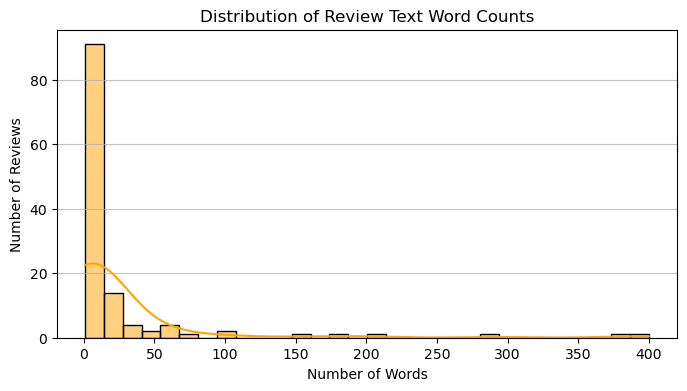

In [25]:
#plotting the distribution of word counts
plt.figure(figsize=(8, 4))
sns.histplot(df['word_count'].value_counts(), bins=30, kde=True, color='orange')
plt.title('Distribution of Review Text Word Counts')
plt.xlabel('Number of Words')
plt.ylabel('Number of Reviews')
plt.grid(axis='y', alpha=0.75)

plt.show()

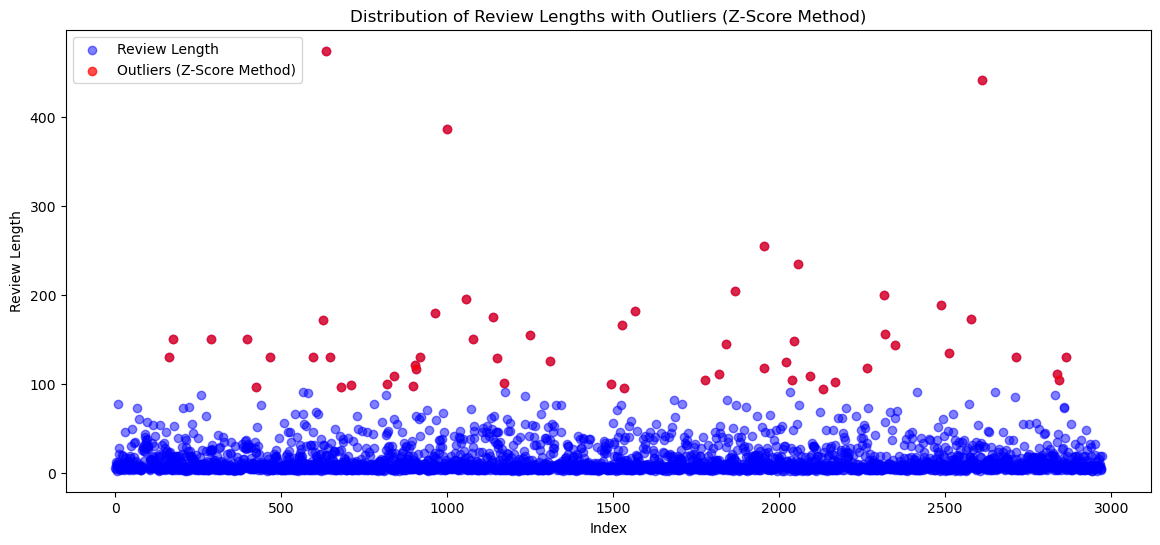

In [26]:
df['z_score'] = (df['word_count'] - df['word_count'].mean()) / df['word_count'].std()

outliers = df[np.abs(df['z_score']) > 3]

# Plotting
plt.figure(figsize=(14, 6))
plt.scatter(df.index, df['word_count'], label='Review Length', color='blue', alpha=0.5)
plt.scatter(outliers.index, outliers['word_count'], label='Outliers (Z-Score Method)', color='red', alpha=0.7)
plt.title('Distribution of Review Lengths with Outliers (Z-Score Method)')
plt.xlabel('Index')
plt.ylabel('Review Length')
plt.legend()
plt.show()

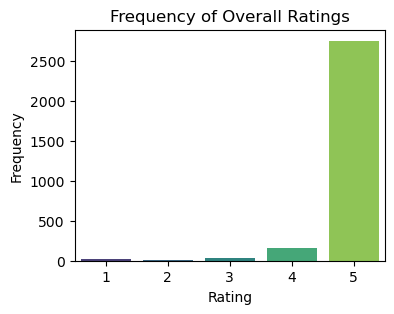

In [27]:
#showing the frequency of overall ratings and rating labels
import seaborn as sns
import matplotlib.pyplot as plt

# Count the frequency of each rating
rating_counts = df['overall'].value_counts()

# Plot the frequency of each rating using seaborn
plt.figure(figsize=(4, 3))
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='viridis')
plt.title('Frequency of Overall Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')

plt.show()

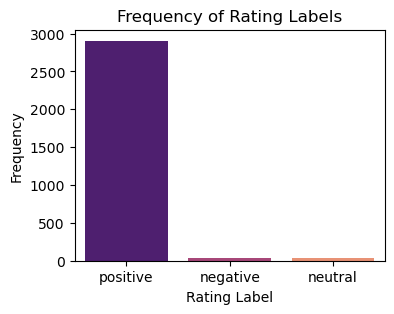

(2972, 14)


In [28]:
# Count the frequency of each rating label
label_counts = df['rating_label'].value_counts()

# Plot the frequency of each rating label using seaborn
plt.figure(figsize=(4, 3))
sns.barplot(x=label_counts.index, y=label_counts.values, palette='magma')
plt.title('Frequency of Rating Labels')
plt.xlabel('Rating Label')
plt.ylabel('Frequency')

plt.show()
print(df.shape)

#### Reviewers outliers

In [29]:
# Remove leading and trailing whitespaces and convert to lowercase
df['reviewText_cleaned'] = df['reviewText'].str.strip().str.lower()

# Group by reviewerID and reviewText_cleaned (cleaned review text) and count the occurrences
review_frequency = df.groupby(['reviewerID', 'reviewText_cleaned','reviewTime']).size().reset_index(name='review_count')

# Sort the list by review count in descending order
review_frequency_sorted = review_frequency.sort_values(by='review_count', ascending=False)

# Print the sorted DataFrame
print(review_frequency_sorted.head())

# Calculate the mean review count
mean_review_count = review_frequency['review_count'].mean()
print("\nMean review count:", mean_review_count)

# Calculate the standard deviation of review counts
std_review_count = review_frequency['review_count'].std()

# Define a threshold for outliers (3 standard deviations from the mean)
threshold = 3

# Calculate the lower and upper bounds for outliers
lower_bound = mean_review_count - (threshold * std_review_count)
upper_bound = mean_review_count + (threshold * std_review_count)

# Identify outliers based on the bounds
outliers = review_frequency[(review_frequency['review_count'] < lower_bound) | (review_frequency['review_count'] > upper_bound)]

# Print the outliers
print("\nOutliers:")
print(outliers)

          reviewerID                 reviewText_cleaned   reviewTime  \
1523  A3OHGWD8LIDZ8K      fast delivery and card worked  03 10, 2015   
1920   ALQUMN89FI5HD  great gift card worked perfectly.  11 27, 2017   
1908   AKT3Z3O3T26PL                              great  02 15, 2018   
1159  A32MAHV0PG6YU6    does what a gift card should :)  12 14, 2017   
566   A1YWA3Z785KX03               arrived within 5 min  03 10, 2017   

      review_count  
1523            21  
1920            16  
1908            13  
1159            13  
566             11  

Mean review count: 1.3900841908325539

Outliers:
          reviewerID                                 reviewText_cleaned  \
8     A11F143J72N3QZ                                               gift   
85    A15FGESGPI84VP                                   its a gift card.   
90    A16QCOFOP5DW4I                                              great   
167   A1EKEP11L6DPIM                                        thank you!!   
189   A1FJGAOIKU

## 4. Pre-process the text for VADER

In [30]:
# Step 1: Perform Sentiment Analysis
# Ensure you have the VADER lexicon downloaded
nltk.download('vader_lexicon')

# Initialize the SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Function to get the compound sentiment score for a text
def get_sentiment_score(text):
    return sia.polarity_scores(text)['compound']

# Apply sentiment analysis on the combined review texts
df['sentiment_score'] = df['combined_text'].apply(get_sentiment_score)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\saman\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [31]:
df['rating_label'].value_counts()

rating_label
positive    2906
negative      33
neutral       33
Name: count, dtype: int64

In [32]:
df['overall'].value_counts()

overall
5    2752
4     154
3      33
1      22
2      11
Name: count, dtype: int64

In [33]:
df['sentiment_score'].describe()

count    2972.000000
mean        0.619738
std         0.329863
min        -0.974600
25%         0.440400
50%         0.700300
75%         0.872000
max         0.999400
Name: sentiment_score, dtype: float64

In [34]:
df['rating_label_vader'] = df['sentiment_score'].apply(lambda x: 'positive' if x > 0 
                                                       else ('neutral' 
                                                             #if (x > -0.05 and x < 0.05) 
                                                             if(x == 0)
                                                             else 'negative'))


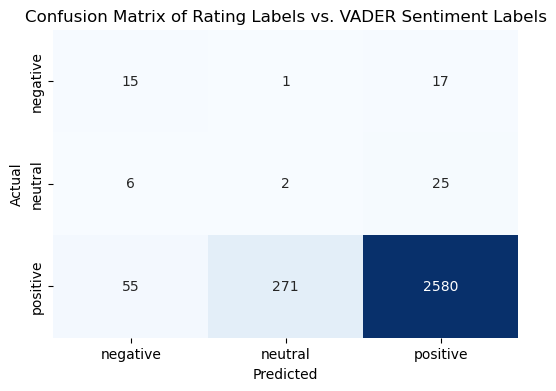

In [35]:
#Comparing the rating labels and the VADER sentiment labels
# Create a confusion matrix
conf_matrix = pd.crosstab(df['rating_label'], df['rating_label_vader'], rownames=['Actual'], colnames=['Predicted'])

# Plot the confusion matrix using seaborn
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix of Rating Labels vs. VADER Sentiment Labels')
plt.show()

In [36]:
#printing the accuracy of the VADER sentiment labels
# Calculate the accuracy of the VADER sentiment labels
accuracy = (conf_matrix['negative']['negative'] + conf_matrix['positive']['positive'] + conf_matrix['neutral']['neutral']) / conf_matrix.values.sum()
print("accuracy of vader lexicon:", accuracy)
from sklearn.metrics import f1_score
F1_score = f1_score(df['rating_label'], df['rating_label_vader'], average='weighted')
print("F1 score of vader lexicon:", F1_score)

accuracy of vader lexicon: 0.8738223418573351
F1 score of vader lexicon: 0.9159016048180161


In [37]:
#show the reviews that are misclassified
misclassified_reviews = df[df['rating_label'] != df['rating_label_vader']]

In [38]:
misclassified_reviews.count()

overall               375
verified              375
reviewTime            375
reviewerID            375
asin                  375
reviewerName          375
reviewText            375
summary               375
unixReviewTime        375
ID_Name               375
rating_label          375
combined_text         375
word_count            375
z_score               375
reviewText_cleaned    375
sentiment_score       375
rating_label_vader    375
dtype: int64

In [39]:
pd.set_option('display.max_colwidth', None)
misclassified_reviews[(misclassified_reviews['rating_label'] == 'positive') & (misclassified_reviews['rating_label_vader'] == 'negative')][['rating_label','rating_label_vader','combined_text']]


,rating_label,rating_label_vader,combined_text
39,positive,negative,"How can you go wrong with a amazon gift certificate, you can't Terrific"
95,positive,negative,If you are ever stuck on what to get kids (tweens) this is the way to go!\nWho does not love gift cards? They are the same as cash and not as impersonal. That way they spend the money to get what they want and you know they cannot return to store to exchange. Great gift idea
100,positive,negative,"Once again, who but Donald Trump (perhaps The Walton family) could hate an Amazon Gift Card? who but Donald Trump (perhaps The Walton family) could hate an Amazon Gift Card"
173,positive,negative,"Delivered as expected, no complaints! Five Stars"
295,positive,negative,What's not to like Five Stars
312,positive,negative,Easy to use No problems
354,positive,negative,Whats not to love about a gift card ??? Five Stars
512,positive,negative,What's not to love Five Stars
649,positive,negative,Who won't love a gift? Plus it was nicely packed with a good quality cardboard box. They are hard card boards and has magnetics to keep them shut. Who won't love a gift?
681,positive,negative,"Kinda funky. Thought it would be prettier than it is. Just tin, but it's what's inside that counts. Right? Never saw a snowflake like this."


In [40]:
misclassified_reviews[(misclassified_reviews['rating_label']=='positive') & (misclassified_reviews['rating_label_vader']=='negative')][['rating_label','rating_label_vader',]]

,rating_label,rating_label_vader
39,positive,negative
95,positive,negative
100,positive,negative
173,positive,negative
295,positive,negative
312,positive,negative
354,positive,negative
512,positive,negative
649,positive,negative
681,positive,negative


## 5. Selecting 1000 reviews from the dataset

In [41]:
#selecting 1000 reviews randomly
df_1000 = df.sample(n=1000, random_state=1)
df_1000.head()


,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,ID_Name,rating_label,combined_text,word_count,z_score,reviewText_cleaned,sentiment_score,rating_label_vader
1984,5,True,"01 4, 2016",A15FGESGPI84VP,B00JJ59UA8,Tamara from NC,Its a gift card.,Five Stars,1451865600,A15FGESGPI84VP - Tamara from NC,positive,Its a gift card. Five Stars,6,-0.376483,its a gift card.,0.4404,positive
2369,5,True,"12 21, 2015",A3G5OIVLDJLM7B,B00UW1CEMY,Amazon Customer,Good ideal,convenient,1450656000,A3G5OIVLDJLM7B - Amazon Customer,positive,Good ideal convenient,3,-0.491807,good ideal,0.7430,positive
2085,5,True,"11 9, 2015",ASMBYX11IUPJR,B00MV9H6VY,Brian Miller,good gift card,good,1447027200,ASMBYX11IUPJR - Brian Miller,positive,good gift card good,4,-0.453366,good gift card,0.8271,positive
1783,5,True,"12 6, 2016",A1L2NJYQ9O10TP,B00GOLGWVK,Lee,Great price and good food.,Five Stars,1480982400,A1L2NJYQ9O10TP - Lee,positive,Great price and good food. Five Stars,7,-0.338042,great price and good food.,0.7906,positive
1965,5,True,"01 18, 2016",A2W3RQOSC87P4A,B00JDQJZWG,Linda Murphy on,"My gift cerficate, including this adorable cupcake, was delivered in record time. Thank you!....","including this adorable cupcake, was delivered in record time",1453075200,A2W3RQOSC87P4A - Linda Murphy on,positive,"My gift cerficate, including this adorable cupcake, was delivered in record time. Thank you!.... including this adorable cupcake, was delivered in record time",23,0.277017,"my gift cerficate, including this adorable cupcake, was delivered in record time. thank you!....",0.9215,positive


## 6.A Modeling (Sentiment Analysis) - VADER Lexicon Approach

In [42]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import spacy
import string


# Load spaCy model for tokenization
nlp = spacy.load('en_core_web_sm')

# Define the list of stopwords and create the lemmatizer object
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Tokenize the text using spaCy
    doc = nlp(text)
    tokens = [token.text for token in doc]

    # Remove stopwords
    tokens = [token for token in tokens if token.lower() not in stop_words]

    # Lemmatize each word
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Join tokens back into text
    preprocessed_text = ' '.join(tokens)

    return preprocessed_text


df_1000['reviews_after_preprocessing'] = df_1000['combined_text'].apply(preprocess_text)
df_1000['reviews_after_preprocessing'].head()


ModuleNotFoundError: No module named 'spacy'

In [ ]:
df_1000['vader_sentiment_score_after_preprocessing'] = df_1000['reviews_after_preprocessing'].apply(get_sentiment_score)
df_1000['rating_label_vader_after_preprocessing'] = df_1000['vader_sentiment_score_after_preprocessing'].apply(lambda x: 'positive' if x > 0
                                                                                                     else ('neutral' if x == 0
                                                                                                           else 'negative'))
confmatrix_after_preprocessing = pd.crosstab(df_1000['rating_label'], df_1000['rating_label_vader_after_preprocessing'], rownames=['Actual'], colnames=['Predicted'])

plt.figure(figsize=(6,4))
sns.heatmap(confmatrix_after_preprocessing, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix of Rating Labels vs. VADER Sentiment Labels After Preprocessing')
plt.show()

In [ ]:
#printing the accuracy of the VADER sentiment labels after preprocessing
accuracy_after_preprocessing = (confmatrix_after_preprocessing['negative']['negative'] + confmatrix_after_preprocessing['positive']['positive'] + confmatrix_after_preprocessing['neutral']['neutral']) / confmatrix_after_preprocessing.values.sum()
print("accuracy of vader lexicon after preprocessing:", accuracy_after_preprocessing)
F1_score_after_preprocessing = f1_score(df_1000['rating_label'], df_1000['rating_label_vader_after_preprocessing'], average='weighted')
print("F1 score of vader lexicon after preprocessing:", F1_score_after_preprocessing)

## 6.A Modeling (Sentiment Analysis) - sentiwordnet Lexicon Approach

In [66]:
import nltk
from nltk.corpus import sentiwordnet as swn
from nltk.corpus import wordnet as wn
from nltk.tag import pos_tag
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK resources
nltk.download('sentiwordnet')
nltk.download('wordnet')

# Function to map PennTreebank tags to WordNet tags
def penn_to_wn(tag):
    if tag.startswith('J'):
        return wn.ADJ
    elif tag.startswith('N'):
        return wn.NOUN
    elif tag.startswith('R'):
        return wn.ADV
    elif tag.startswith('V'):
        return wn.VERB
    return None

# Function to get the SentiWordNet score for a sentence
def get_sentiwordnet_score(text):
    # Tokenize the text and tag the words
    tokens = nltk.word_tokenize(text)
    after_tagging = pos_tag(tokens)

    sentiment = 0.0

    # Initialize the WordNet lemmatizer
    lemmatizer = WordNetLemmatizer()

    # Iterate over the tagged words
    for word, tag in after_tagging:
        wn_tag = penn_to_wn(tag)
        if wn_tag not in (wn.NOUN, wn.ADJ, wn.ADV):
            continue

        # Lemmatize the word
        lemma = lemmatizer.lemmatize(word, pos=wn_tag)
        if not lemma:
            continue

        # Get WordNet synsets for the lemmatized word
        synsets = wn.synsets(lemma, pos=wn_tag)
        if not synsets:
            continue

        # Take the first synset (the most common one)
        synset = synsets[0]
        swn_synset = swn.senti_synset(synset.name())

        # Add the positivity and negativity scores
        sentiment += swn_synset.pos_score() - swn_synset.neg_score()
        # Print
        print("Token:", word)
        print("Tag:", tag)
        print("Lemma:", lemma)
        print("Synsets:", synsets)
        print("Sentiment:", swn_synset.pos_score() - swn_synset.neg_score())
        print()
        
    # Print text and total sentiment
    print("------------------------------------------")
    print("Text:", text)
    print("Sentimient:", sentiment)
    print()
    print("------------------------------------------")
    
    return sentiment

df_1000['reviews_after_preprocessing'] = df_1000['combined_text'].apply(get_sentiwordnet_score)
df_1000['reviews_after_preprocessing'].head()

[nltk_data] Downloading package sentiwordnet to
[nltk_data]     C:\Users\saman\AppData\Roaming\nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\saman\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Token: gift
Tag: NN
Lemma: gift
Synsets: [Synset('gift.n.01'), Synset('endowment.n.01'), Synset('giving.n.01')]
Sentiment: 0.25

Token: card
Tag: NN
Lemma: card
Synsets: [Synset('card.n.01'), Synset('card.n.02'), Synset('card.n.03'), Synset('card.n.04'), Synset('wag.n.01'), Synset('poster.n.01'), Synset('calling_card.n.02'), Synset('card.n.08'), Synset('menu.n.01'), Synset('batting_order.n.01'), Synset('circuit_board.n.01')]
Sentiment: 0.0

Token: Stars
Tag: NNS
Lemma: Stars
Synsets: [Synset('star.n.01'), Synset('ace.n.03'), Synset('star.n.03'), Synset('star.n.04'), Synset('star.n.05'), Synset('headliner.n.01'), Synset('asterisk.n.01'), Synset('star_topology.n.01')]
Sentiment: 0.0

------------------------------------------
Texto: Its a gift card. Five Stars
Sentimiento: 0.25

------------------------------------------
Token: Good
Tag: JJ
Lemma: Good
Synsets: [Synset('good.a.01'), Synset('full.s.06'), Synset('good.a.03'), Synset('estimable.s.02'), Synset('beneficial.s.01'), Synset('goo

1984    0.25
2369    0.75
2085    1.50
1783    0.75
1965    1.25
Name: reviews_after_preprocessing, dtype: float64

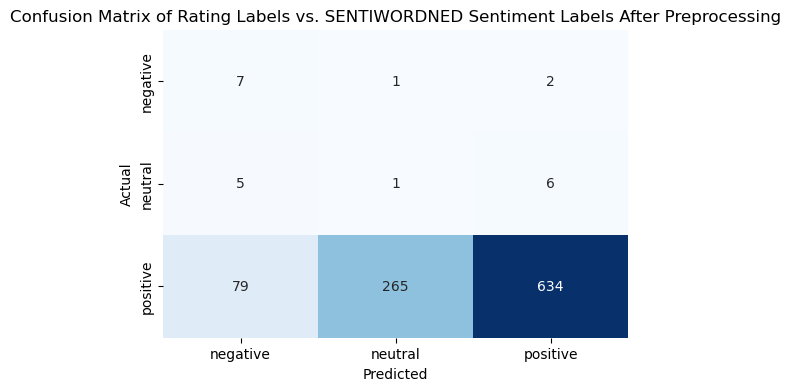

In [46]:
df_1000['rating_label_sentiwordnet_after_preprocessing'] = df_1000['reviews_after_preprocessing'].apply(lambda x: 'positive' if x > 0 else ('neutral' if x == 0 else 'negative'))

confmatrix_after_preprocessing = pd.crosstab(df_1000['rating_label'], df_1000['rating_label_sentiwordnet_after_preprocessing'], rownames=['Actual'], colnames=['Predicted'])

plt.figure(figsize=(6,4))
sns.heatmap(confmatrix_after_preprocessing, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix of Rating Labels vs. SENTIWORDNED Sentiment Labels After Preprocessing')
plt.show()

In [52]:
# Determine misclassified reviews
misclassified_reviews = df_1000[df_1000['rating_label'] != df_1000['rating_label_sentiwordnet_after_preprocessing']]

for index, row in misclassified_reviews.iterrows():
    print("Text:", row['combined_text'])
    print("Actual Label:", row['rating_label'])
    print("Predicted Label:", row['rating_label_sentiwordnet_after_preprocessing'])
    print("=" * 50) 

Text: A birthday present my niece loved. Surprise
Actual Label: positive
Predicted Label: neutral
Text: Received quickly and had no problems! Perfect
Actual Label: positive
Predicted Label: negative
Text: arrived within 5 min Five Stars
Actual Label: positive
Predicted Label: neutral
Text: Present Five Stars
Actual Label: positive
Predicted Label: negative
Text: Satisfied. Four Stars
Actual Label: positive
Predicted Label: neutral
Text: Great Four Stars
Actual Label: positive
Predicted Label: neutral
Text: It worked as advertised. I got the email immediately after purchase and used it at Panera the next day without issue. Works!
Actual Label: positive
Predicted Label: negative
Text: Great product from a great seller Five Stars
Actual Label: positive
Predicted Label: neutral
Text: wish they labeled Five Stars
Actual Label: positive
Predicted Label: neutral
Text: great Five Stars
Actual Label: positive
Predicted Label: neutral
Text: arrived within 5 min Five Stars
Actual Label: positive


In [47]:
#printing the accuracy of the sentiwordnet sentiment labels after preprocessing 
accuracy_after_preprocessing = (confmatrix_after_preprocessing['negative']['negative'] + confmatrix_after_preprocessing['positive']['positive'] + confmatrix_after_preprocessing['neutral']['neutral']) / confmatrix_after_preprocessing.values.sum()
print("accuracy of sentiwordnet lexicon after preprocessing:", accuracy_after_preprocessing)
F1_score_after_preprocessing = f1_score(df_1000['rating_label'], df_1000['rating_label_sentiwordnet_after_preprocessing'], average='weighted')
print("F1 score of sentiwordnet lexicon after preprocessing:", F1_score_after_preprocessing)

accuracy of sentiwordnet lexicon after preprocessing: 0.642
F1 score of sentiwordnet lexicon after preprocessing: 0.766968456415534
